In [1]:
from keras.datasets import reuters
(x_train, y_train), (x_test, y_test)=reuters.load_data(num_words=15000)

Using TensorFlow backend.


In [2]:
x_val=x_train[7000:]
y_val=y_train[7000:]
x_train=x_train[:7000]
y_train=y_train[:7000]

In [3]:
from keras.preprocessing import sequence
x_train=sequence.pad_sequences(x_train, maxlen=120)
x_val=sequence.pad_sequences(x_val, maxlen=120)
x_test=sequence.pad_sequences(x_test, maxlen=120)

In [4]:
x_train[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     1,  3267,   699,  3434,  2295,    56,     2,  7511,
           9,    56,  3906,  1073,    81,     5,  1198,    57,   366,
         737,   132,    20,  4093,     7,     2,    49,  2295, 13415,
        1037,  3267,   699,  3434,     8,     7,    10,   241,    16,
         855,   129,   231,   783,     5,     4,   587,  2295, 13415,
           2,   775,     7,    48,    34,   191,    44,    35,  1795,
         505,    17,    12])

In [5]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train)
y_val=np_utils.to_categorical(y_val)
y_test=np_utils.to_categorical(y_test)

In [6]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
model1=Sequential()
model1.add(Embedding(15000, 128, input_length=120))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(46, activation='softmax'))

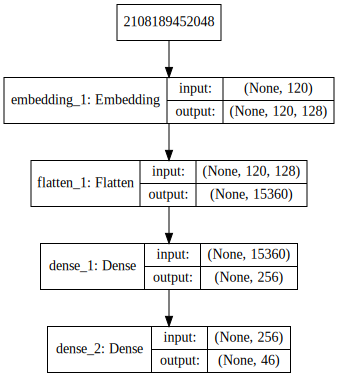

In [8]:
SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
model2=Sequential()
model2.add(Embedding(15000, 128, input_length=120))
model2.add(LSTM(128))
model2.add(Dense(46, activation='softmax'))

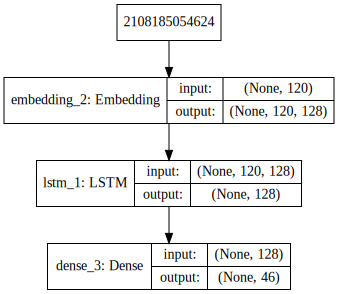

In [10]:
SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

In [11]:
model3=Sequential()
model3.add(Embedding(15000, 128, input_length=120))
model3.add(Dropout(0.2))
model3.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(46, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


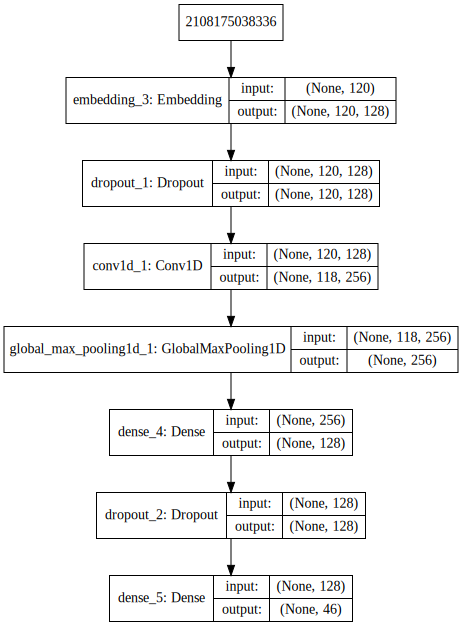

In [12]:
SVG(model_to_dot(model3, show_shapes=True).create(prog='dot', format='svg'))

In [13]:
model4=Sequential()
model4.add(Embedding(15000, 128, input_length=120))
model4.add(Dropout(0.2))
model4.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(128))
model4.add(Dense(46, activation='softmax'))

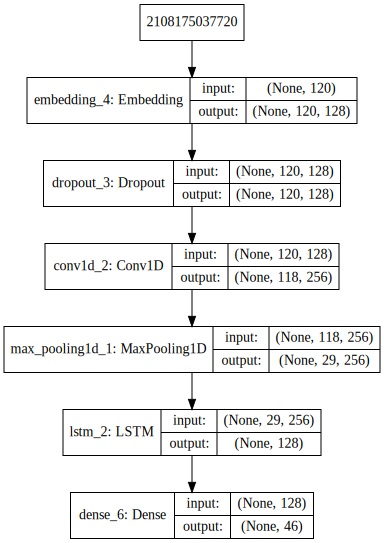

In [14]:
SVG(model_to_dot(model4, show_shapes=True).create(prog='dot', format='svg'))

In [15]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
hist1=model1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 5s 660us/step - loss: 1.9238 - acc: 0.5180 - val_loss: 1.4645 - val_acc: 0.6504
Epoch 2/10
7000/7000 [==============================] - 1s 210us/step - loss: 0.8543 - acc: 0.7997 - val_loss: 1.3012 - val_acc: 0.7028
Epoch 3/10
7000/7000 [==============================] - 1s 209us/step - loss: 0.2796 - acc: 0.9510 - val_loss: 1.3528 - val_acc: 0.6963
Epoch 4/10
7000/7000 [==============================] - 1s 200us/step - loss: 0.1801 - acc: 0.9627 - val_loss: 1.3216 - val_acc: 0.7053
Epoch 5/10
7000/7000 [==============================] - 2s 255us/step - loss: 0.1550 - acc: 0.9617 - val_loss: 1.3416 - val_acc: 0.7003
Epoch 6/10
7000/7000 [==============================] - 2s 311us/step - loss: 0.1363 - acc: 0.9623 - val_loss: 1.3449 - val_acc: 0.7028
Epoch 7/10
7000/7000 [====================

In [17]:
hist2=model2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 53s 8ms/step - loss: 2.4956 - acc: 0.3723 - val_loss: 2.0051 - val_acc: 0.4914
Epoch 2/10
7000/7000 [==============================] - 60s 9ms/step - loss: 1.8881 - acc: 0.5044 - val_loss: 1.7959 - val_acc: 0.5156
Epoch 3/10
7000/7000 [==============================] - 50s 7ms/step - loss: 1.8834 - acc: 0.4997 - val_loss: 1.7018 - val_acc: 0.5616
Epoch 4/10
7000/7000 [==============================] - 71s 10ms/step - loss: 1.5695 - acc: 0.5866 - val_loss: 1.6481 - val_acc: 0.5812
Epoch 5/10
7000/7000 [==============================] - 54s 8ms/step - loss: 1.4099 - acc: 0.6210 - val_loss: 1.5747 - val_acc: 0.6034
Epoch 6/10
7000/7000 [==============================] - 68s 10ms/step - loss: 1.2425 - acc: 0.6687 - val_loss: 1.5770 - val_acc: 0.5979
Epoch 7/10
7000/7000 [==============================] - 54s 8ms/step - loss: 1.0649 - acc: 0.7197 - val_loss: 1.5353 - val_acc: 0.6322
Epoch

In [18]:
hist3=model3.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 3s 483us/step - loss: 2.2871 - acc: 0.4421 - val_loss: 1.7592 - val_acc: 0.5247
Epoch 2/10
7000/7000 [==============================] - 1s 202us/step - loss: 1.6045 - acc: 0.6133 - val_loss: 1.3983 - val_acc: 0.6751
Epoch 3/10
7000/7000 [==============================] - 1s 204us/step - loss: 1.2800 - acc: 0.6914 - val_loss: 1.2065 - val_acc: 0.7109
Epoch 4/10
7000/7000 [==============================] - 2s 290us/step - loss: 1.0230 - acc: 0.7526 - val_loss: 1.0767 - val_acc: 0.7442
Epoch 5/10
7000/7000 [==============================] - 2s 222us/step - loss: 0.8121 - acc: 0.7970 - val_loss: 1.0369 - val_acc: 0.7614
Epoch 6/10
7000/7000 [==============================] - 1s 202us/step - loss: 0.6247 - acc: 0.8454 - val_loss: 1.0126 - val_acc: 0.7719
Epoch 7/10
7000/7000 [==============================] - 1s 209us/step - loss: 0.4737 - acc: 0.8810 - val_loss: 1.0533 - val_acc: 0.7578


In [19]:
hist4=model4.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 14s 2ms/step - loss: 2.1714 - acc: 0.4577 - val_loss: 1.7388 - val_acc: 0.5474
Epoch 2/10
7000/7000 [==============================] - 14s 2ms/step - loss: 1.6076 - acc: 0.5836 - val_loss: 1.5435 - val_acc: 0.6095
Epoch 3/10
7000/7000 [==============================] - 14s 2ms/step - loss: 1.2891 - acc: 0.6696 - val_loss: 1.3356 - val_acc: 0.6675
Epoch 4/10
7000/7000 [==============================] - 13s 2ms/step - loss: 0.9992 - acc: 0.7467 - val_loss: 1.3663 - val_acc: 0.6579
Epoch 5/10
7000/7000 [==============================] - 14s 2ms/step - loss: 0.8292 - acc: 0.7871 - val_loss: 1.2740 - val_acc: 0.6907
Epoch 6/10
7000/7000 [==============================] - 14s 2ms/step - loss: 0.6820 - acc: 0.8230 - val_loss: 1.2547 - val_acc: 0.7089
Epoch 7/10
7000/7000 [==============================] - 15s 2ms/step - loss: 0.5499 - acc: 0.8556 - val_loss: 1.2873 - val_acc: 0.7104
Epoch 8

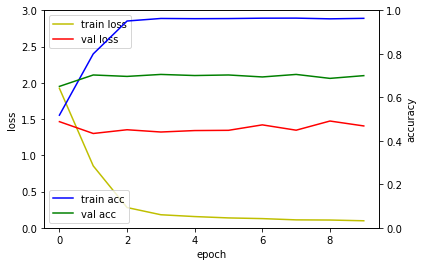

In [26]:
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()

loss_ax.plot(hist1.history['loss'], 'y', label='train loss')
loss_ax.plot(hist1.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0, 3])

acc_ax.plot(hist1.history['acc'], 'b', label='train acc')
acc_ax.plot(hist1.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0, 1])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

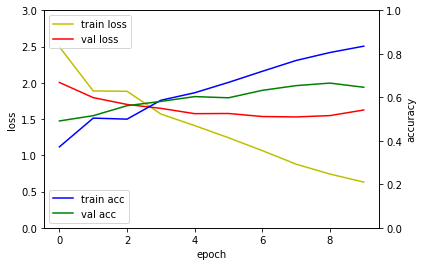

In [25]:
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()

loss_ax.plot(hist2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist2.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0, 3])

acc_ax.plot(hist2.history['acc'], 'b', label='train acc')
acc_ax.plot(hist2.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0, 1])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

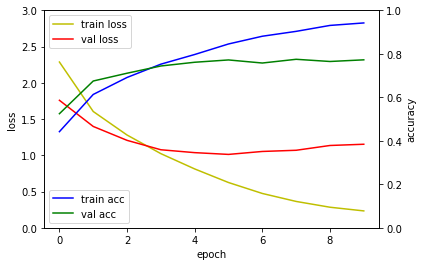

In [22]:
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()

loss_ax.plot(hist3.history['loss'], 'y', label='train loss')
loss_ax.plot(hist3.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0, 3])

acc_ax.plot(hist3.history['acc'], 'b', label='train acc')
acc_ax.plot(hist3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0, 1])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

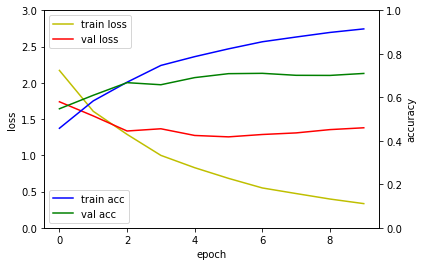

In [23]:
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()

loss_ax.plot(hist4.history['loss'], 'y', label='train loss')
loss_ax.plot(hist4.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0, 3])

acc_ax.plot(hist4.history['acc'], 'b', label='train acc')
acc_ax.plot(hist4.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0, 1])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

In [27]:
loss_metrics1=model1.evaluate(x_test, y_test, batch_size=64)
print(loss_metrics1)

2246/2246 [==============================] - 0s 50us/step
[1.4548253915401197, 0.6878895814781835]


In [28]:
loss_metrics2=model2.evaluate(x_test, y_test, batch_size=64)
print(loss_metrics2)

2246/2246 [==============================] - 6s 3ms/step
[1.7494841099634622, 0.6357969724484458]


In [29]:
loss_metrics3=model3.evaluate(x_test, y_test, batch_size=64)
print(loss_metrics3)

2246/2246 [==============================] - 0s 51us/step
[1.2725129694356945, 0.7595725735170121]


In [30]:
loss_metrics4=model4.evaluate(x_test, y_test, batch_size=64)
print(loss_metrics4)

2246/2246 [==============================] - 2s 825us/step
[1.4413248952328894, 0.6807658058771149]


In [33]:
from keras.preprocessing.text import text_to_word_sequence

(7000, 120)